In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Import data
train_df = pd.read_csv('/PyLearning/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/PyLearning/house-prices-advanced-regression-techniques/test.csv')

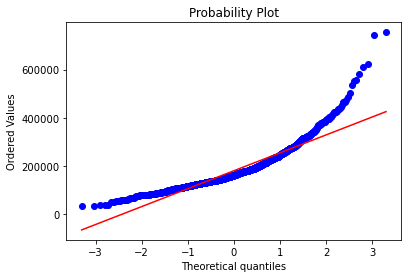

In [3]:
#Initiate a Q-Q plot: checking if the residuals are normally distributed
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)
plt.show()
#Right-tailed, need to tranform to normal

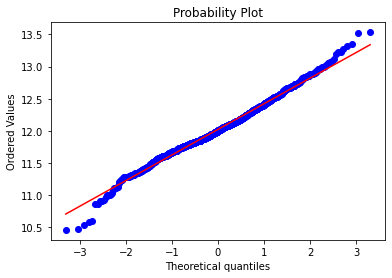

In [4]:
#Log-transform the target variable 
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)
plt.show()

In [5]:
#Data Preparations
y_train = train_df['SalePrice']
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df = df.drop(['Id', 'SalePrice'], axis=1)

In [6]:
#Impute missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [8]:
copy_1 = df.copy()

for feature in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",'GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"MasVnrType",'MSSubClass']:
    copy_1[feature] = copy_1[feature].fillna('None')
    
copy_2 = copy_1.copy()
for feature in ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',"MasVnrArea"]:
    copy_2[feature] = copy_2[feature].fillna(0)
    
copy_3 = copy_2.copy()
for feature in ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']:
    copy_3[feature] = copy_3[feature].fillna(0)
    
copy_4 = copy_3.copy()
copy_4['Functional'] = copy_4['Functional'].fillna('Typ') 

copy_5 = copy_4.copy()
copy_5 = copy_5.drop(['Utilities'], axis = 1)

copy_6 = copy_5.copy()
copy_6['LotFrontage'] = copy_6.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [9]:
#Encode categorical variables
copy_7 = copy_6.copy()
copy_7 = pd.get_dummies(copy_7)

In [10]:
#Standardize numerical values
from sklearn.preprocessing import StandardScaler

copy_8 = copy_7.copy()
numerical_features = copy_8.dtypes[copy_8.dtypes != 'object'].index

scaler = StandardScaler()
copy_8[numerical_features] = scaler.fit_transform(copy_8[numerical_features])

In [11]:
#Split back to train and test sets
copy_8.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.209359,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.481900,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.071107,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.439779,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.666236,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [12]:
copy_8.head(-5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.209359,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.481900,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.071107,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.439779,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.666236,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2.890174,-2.237052,-1.103031,-1.481920,0.391237,-0.043346,-0.682812,-0.567016,0.177219,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2910,2.419700,-2.237052,-1.101256,-1.481920,-1.405805,0.022691,-0.587076,-0.567016,-0.415500,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2911,-0.873616,0.481900,0.407815,-0.772552,-0.507284,-0.076364,-0.252000,0.517850,-0.707469,1.740671,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2912,2.419700,-2.237052,-1.095042,-1.481920,-0.507284,-0.043346,-0.682812,-0.567016,-0.073041,-0.293025,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693


In [14]:
train_df = copy_8[:train_df.shape[0]]
test_df = copy_8[train_df.shape[0]:]

In [16]:
print(train_df.describe())
print('---------')
print(test_df.describe())

        MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     -0.005656     0.029188     0.044221     0.007266     0.009673   
std       0.995065     1.033822     1.265751     0.981053     0.999874   
min      -0.873616    -2.237052    -1.124590    -3.610024    -4.101368   
25%      -0.873616    -0.439779    -0.331566    -0.772552    -0.507284   
50%      -0.167905     0.021061    -0.087452    -0.063185    -0.507284   
75%       0.302568     0.481900     0.181772     0.646183     0.391237   
max       3.125411    11.219456    26.006354     2.774287     3.086800   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     -0.001485      0.028782     0.009625     0.005198    -0.017830  ...   
std       0.997248      0.988255     1.010667     1.001252     0.953705  ...   
min      -3.2

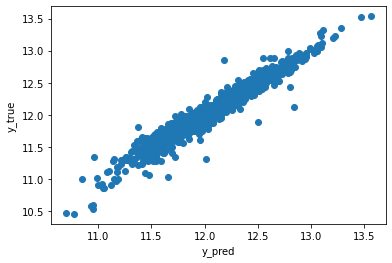

In [18]:
#Build and train a linear regression model
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(train_df, y_train)
plt.scatter(logreg.predict(train_df), y_train)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()